## Defining Hamiltonians in MPSKit

In [1]:
using MPSKit, MPSKitModels, TensorKit
using ProgressMeter, Plots

## Spin operators
In MPSKit, the operators are defined as TensorMaps. The typical examples are spin operators, but there are other operators such as fermionic operators. Further information can be found [here](https://github.com/maartenvd/MPSKitModels.jl/tree/master/test).

In [2]:
# We specify the spins in the “spin” argument.
spin = 1//2
println(S_x(spin=spin))
println(S_y(spin=spin))
println(S_z(spin=spin))
println(S_plus(spin=spin))
println(S_min(spin=spin))

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  0.5 + 0.0im
 0.5 + 0.0im  0.0 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  0.0 - 0.5im
 0.0 + 0.5im  0.0 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.5 + 0.0im   0.0 + 0.0im
 0.0 + 0.0im  -0.5 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  1.0 + 0.0im
 0.0 + 0.0im  0.0 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  0.0 + 0.0im
 1.0 + 0.0im  0.0 + 0.0im



Two site operator are also defined in the same way.

In [3]:
spin = 1//2
println(S_xx(spin=spin))
println(S_yy(spin=spin))
println(S_zz(spin=spin))
println(S_plusmin(spin=spin))
println(S_minplus(spin=spin))

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2)):
[:, :, 1, 1] =
 0.0 + 0.0im   0.0 + 0.0im
 0.0 + 0.0im  0.25 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.25 + 0.0im
 0.0 + 0.0im   0.0 + 0.0im

[:, :, 1, 2] =
  0.0 + 0.0im  0.0 + 0.0im
 0.25 + 0.0im  0.0 + 0.0im

[:, :, 2, 2] =
 0.25 + 0.0im  0.0 + 0.0im
  0.0 + 0.0im  0.0 + 0.0im

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2)):
[:, :, 1, 1] =
 0.0 + 0.0im    0.0 + 0.0im
 0.0 + 0.0im  -0.25 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.25 + 0.0im
 0.0 + 0.0im   0.0 + 0.0im

[:, :, 1, 2] =
  0.0 + 0.0im  0.0 + 0.0im
 0.25 + 0.0im  0.0 + 0.0im

[:, :, 2, 2] =
 -0.25 - 0.0im  0.0 + 0.0im
   0.0 + 0.0im  0.0 + 0.0im

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2)):
[:, :, 1, 1] =
 0.25 + 0.0im  0.0 + 0.0im
  0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
   0.0 + 0.0im   0.0 + 0.0im
 -0.25 + 0.0im  -0.0 + 0.0im

[:, :, 1, 2] =
 0.0 + 0.0im  -0.25 + 0.0im
 0.0 + 0.0im   -0.0 + 0.0im

[:, :, 2, 2] =
  0.0 + 0.0im  -0.0 + 0.0im
 -0.0 + 0.0im  0.25 - 0.0im

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2

Equivalently, we can define the two site operators using tensor product.

In [4]:
Z = S_z(spin = spin)
ZZ = Z ⊗ Z
ZZZ = Z ⊗ Z ⊗ Z

# \approx check if the two TensorMaps are close.
println(S_zz(spin=spin) ≈ ZZ)

true


In Julia, LaTeX format is supported. For example, $\sigma$ can be typed using “\sigma” and the tab key.

The above tensor product $\otimes$ corresponds to “\otimes”.

Lower and upper cases are a little tricky: You type “\sigma” + tab + “\\^z” + tab to obtain $\sigma^z$. ("\\_z" for lower case)

In [5]:
# Equivalent to 4*S_zz, yet written in the LaTeX format.
σᶻᶻ(spin=spin) ≈ 4*S_zz(spin=spin)

true

Ridiculous example might be the following. You might want to try some.

In [6]:
HₑₗₗₒWₒᵣₗᵈ = "Hello World"
print(HₑₗₗₒWₒᵣₗᵈ)

Hello World

# Constructing Hamiltonian(FiniteChain)

Using spin operators, we can define Hamiltonian. Here, let us consider the transverse-field Ising model as an example!

In [7]:
# Definition of local terms. 
# Heisenberg term is XXZ_term = S_xx(spin=spin)+S_yy(spin=spin)+Δ*S_zz(spin=spin)
J = 1.0 
g = 1.0
ZZ_term = -J*4*S_zz(spin=spin)
X_term = -J*g*2*S_x(spin=spin)

TensorMap(ℂ^2 ← ℂ^2):
 -0.0 - 0.0im  -1.0 - 0.0im
 -1.0 - 0.0im  -0.0 - 0.0im


To construct the Hamiltonian, 

In [8]:
L = 100
χ = 20
lattice = FiniteChain(L)
H_TF = @mpoham sum(nearest_neighbours(lattice)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice)) do i
            # println(i)
            return X_term{i}
    end;

### For more general purposes, we can rewrite as following

In [9]:
L = 100
χ = 20
lattice = FiniteChain(L)
H_TF = @mpoham sum(1:(L-1)) do i
            return ZZ_term{lattice[i],lattice[i+1]}
        end + sum(1:L) do i
            return X_term{lattice[i]}
        end 
# Add + sum(1:(L-2)) do i return ZZZ{lattice[i],lattice[i+1],lattice[i+2] end 
# if you like to add terms with more sites.

MPOHamiltonian{ComplexSpace, TrivialTensorMap{ComplexSpace, 2, 2, Matrix{ComplexF64}}, ComplexF64}(MPSKit.SparseMPOSlice{ComplexSpace, TrivialTensorMap{ComplexSpace, 2, 2, Matrix{ComplexF64}}, ComplexF64}[[TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 1.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  1.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 -1.4142135623730945 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  1.414213562373095 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 -0.0 + 0.0im  -1.0 + 0.0im

[:, :, 2, 1] =
 -1.0 + 0.0im  0.0 + 0.0im
; TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
; TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^

In [10]:
# 20 is bond dimension and C^2 is a physical space of spin-1/2
# If use C^(2*S+1) for spin-S systems.
state = FiniteMPS(rand,ComplexF64,L,ℂ^2,ℂ^χ)

100-site FiniteMPS:
┌ CL[101]: TensorMap(ℂ^1 ← ℂ^1)
├── AL[100]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^1)
├── AL[99]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^2)
├── AL[98]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^4)
├── AL[97]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^8)
├── AL[96]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^16)
├── AL[95]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[94]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[93]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[92]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[91]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[90]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
│⋮
├── AL[10]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[9]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[8]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[7]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[6]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[5]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^20)
├── AL[4]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^16)
├── AL[3]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^8)
├── AL[2]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^4)
└── AL[1]: TensorMap((ℂ^1 ⊗ ℂ^2) ← ℂ^2)


In [11]:
ψ₀, cache, delta = find_groundstate(state, H_TF, DMRG());

┌ Info: DMRG iteration:
│   iter = 1
│   ϵ = 0.0002505866523712274
│   λ = -126.96187555817939 - 5.5325593102605675e-14im
└   Δt = 6.401448936
┌ Info: DMRG iteration:
│   iter = 2
│   ϵ = 8.245552908492009e-7
│   λ = -126.96187670914472 + 5.484454887292566e-14im
└   Δt = 5.275242156
┌ Info: DMRG iteration:
│   iter = 3
│   ϵ = 2.486157703790275e-7
│   λ = -126.96187671639473 + 2.820347334227526e-15im
└   Δt = 3.772838151
┌ Info: DMRG iteration:
│   iter = 4
│   ϵ = 2.32196509905455e-7
│   λ = -126.96187672052164 + 1.9879633750923344e-14im
└   Δt = 3.18171329
┌ Info: DMRG iteration:
│   iter = 5
│   ϵ = 2.997456052254172e-7
│   λ = -126.961876721922 - 4.5349373283164686e-14im
└   Δt = 2.462141847
┌ Info: DMRG iteration:
│   iter = 6
│   ϵ = 1.5485082654084694e-7
│   λ = -126.96187672209831 + 1.1317848976066642e-15im
└   Δt = 1.727360971
┌ Info: DMRG iteration:
│   iter = 7
│   ϵ = 2.8756470615468546e-8
│   λ = -126.96187672210425 + 6.30532239796759e-14im
└   Δt = 1.080444918
┌ Info: DMR

┌ Info: DMRG iteration:
│   iter = 33
│   ϵ = 1.4933200696262627e-11
│   λ = -126.96187672210463 - 3.652139727859682e-14im
└   Δt = 0.127152904
┌ Info: DMRG iteration:
│   iter = 34
│   ϵ = 1.1197564677414013e-11
│   λ = -126.96187672210442 - 8.745182965475739e-14im
└   Δt = 0.1269912
┌ Info: DMRG iteration:
│   iter = 35
│   ϵ = 8.39683029911462e-12
│   λ = -126.96187672210527 + 1.597807260126311e-14im
└   Δt = 0.122765765
┌ Info: DMRG iteration:
│   iter = 36
│   ϵ = 6.297189441515173e-12
│   λ = -126.96187672210502 + 1.4932990937312534e-14im
└   Δt = 0.124645018
┌ Info: DMRG iteration:
│   iter = 37
│   ϵ = 4.722893639430402e-12
│   λ = -126.96187672210479 + 6.60756732628801e-14im
└   Δt = 0.125299975
┌ Info: DMRG iteration:
│   iter = 38
│   ϵ = 3.542433044038665e-12
│   λ = -126.96187672210517 + 2.798309573925986e-14im
└   Δt = 0.120349779
┌ Info: DMRG iteration:
│   iter = 39
│   ϵ = 2.6571784204433965e-12
│   λ = -126.96187672210506 + 3.8971358856065236e-15im
└   Δt = 0.12014635

In [12]:
E₀ = sum(real(expectation_value(ψ₀,H_TF)))/(L)

-1.2696187672210488

In [13]:
-4/pi

-1.2732395447351628

# Constructing Hamiltonian(InfiniteChain)

In [14]:
lattice∞ = InfiniteChain(1)
χ = 20
H_TF∞ = @mpoham sum(nearest_neighbours(lattice∞)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice∞)) do i
            return X_term{i}
    end;

#### Equivalently, we can rewrite this as followings:

In [15]:
H_TF∞ = @mpoham sum(1:1) do i
            return ZZ_term{lattice∞[i],lattice∞[i+1]}
         end + sum(1:1) do i
            return X_term{lattice∞[i]}
    end;

In [16]:
random_data = TensorMap(rand, ComplexF64, ℂ^χ * ℂ^2, ℂ^χ);
state∞ = InfiniteMPS([random_data]);

In [17]:
# VUMPS can be seen as an upgrade of iDMRG
ψ₀∞, cache, delta = find_groundstate(state∞, H_TF∞, VUMPS());

┌ Info: VUMPS iteration:
│   iter = 1
│   ϵ = 0.011866359077898174
│   λ = -1.2720849079667942 - 1.734723475976807e-17im
└   Δt = 0.057186957
┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.0030338381179138485
│   λ = -1.2730800250093308 + 1.478851763270228e-16im
└   Δt = 0.017917218
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.0008824152059448416
│   λ = -1.273217783811478 - 8.836247705756861e-17im
└   Δt = 0.043359871
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.0002919476579769659
│   λ = -1.273236456794998 - 1.4924042904262969e-16im
└   Δt = 0.041245002
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.00015907162093269463
│   λ = -1.2732382464148753 - 4.119968255444917e-18im
└   Δt = 0.024912835
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 0.00011936354221510635
│   λ = -1.2732386578458446 - 2.0534789146875454e-16im
└   Δt = 0.036878121
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 0.00010025789682908417
│   λ = -1.27323891415323 + 4.358492733391728e-17im
└   Δt = 0.039432317

┌ Info: VUMPS iteration:
│   iter = 34
│   ϵ = 9.245987167498635e-7
│   λ = -1.2732394732325603 + 5.345116710353537e-17im
└   Δt = 0.066311296
┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 7.629035948635495e-7
│   λ = -1.2732394732375985 + 5.453536927602087e-17im
└   Δt = 0.060729601
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 6.293585752517073e-7
│   λ = -1.2732394732410066 - 3.0140820395097023e-17im
└   Δt = 0.065362363
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 5.188182751623353e-7
│   λ = -1.2732394732433139 + 3.220080452281948e-17im
└   Δt = 0.061958301
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 4.2765570817217305e-7
│   λ = -1.2732394732448702 - 4.4777549723651333e-17im
└   Δt = 0.067298443
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 3.52334340888361e-7
│   λ = -1.2732394732459253 + 4.5102810375396984e-17im
└   Δt = 0.060887456
┌ Info: VUMPS iteration:
│   iter = 40
│   ϵ = 2.902764880757577e-7
│   λ = -1.273239473246638 + 3.5019730171281793e-17im
└   Δt = 0.065687

┌ Info: VUMPS iteration:
│   iter = 66
│   ϵ = 1.9350415868397385e-9
│   λ = -1.2732394732481223 - 7.24247051220317e-17im
└   Δt = 0.063604812
┌ Info: VUMPS iteration:
│   iter = 67
│   ϵ = 1.6021089268763054e-9
│   λ = -1.2732394732481247 - 8.315830662963819e-17im
└   Δt = 0.058924564
┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 1.32711466367568e-9
│   λ = -1.2732394732481227 + 3.5019730171281793e-17im
└   Δt = 0.065810679
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 1.0998925081240605e-9
│   λ = -1.2732394732481245 + 1.5829351718288365e-17im
└   Δt = 0.058006233
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 9.120765074715469e-10
│   λ = -1.2732394732481236 + 3.2526065174565133e-19im
└   Δt = 0.06316005
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 7.567535305270775e-10
│   λ = -1.2732394732481245 + 2.5695591487906455e-17im
└   Δt = 0.057382912
┌ Info: VUMPS iteration:
│   iter = 72
│   ϵ = 6.282559696051036e-10
│   λ = -1.273239473248125 - 3.252606517456513e-17im
└   Δt = 0.063

┌ Info: VUMPS iteration:
│   iter = 98
│   ϵ = 6.4155108802701095e-12
│   λ = -1.2732394732481236 + 4.7704895589362195e-17im
└   Δt = 0.048983469
┌ Info: VUMPS iteration:
│   iter = 99
│   ϵ = 5.430791560507446e-12
│   λ = -1.273239473248124 + 3.469446951953614e-18im
└   Δt = 0.055303505
┌ Info: VUMPS iteration:
│   iter = 100
│   ϵ = 4.601634826047577e-12
│   λ = -1.2732394732481231 + 1.093959992037874e-16im
└   Δt = 0.04595533
┌ Warning: VUMPS maximum iterations
│   iter = 100
│   ϵ = 4.601634826047577e-12
│   λ = -1.2732394732481231 + 1.093959992037874e-16im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/vumps.jl:94
┌ Info: VUMPS summary:
│   ϵ = 4.601634826047577e-12
│   λ = -1.2732394732481231 + 1.093959992037874e-16im
└   Δt = 6.561962788


In [18]:
E₀ = real(expectation_value(ψ₀∞,H_TF∞))[0]
println("Exact ground state energy : ",-4/pi)
println("Numerical results : ", E₀)
println("Numerical errors : ", E₀+4/pi)

Exact ground state energy : -1.2732395447351628
Numerical results : -1.2732394732481231
Numerical errors : 7.148703962123193e-8


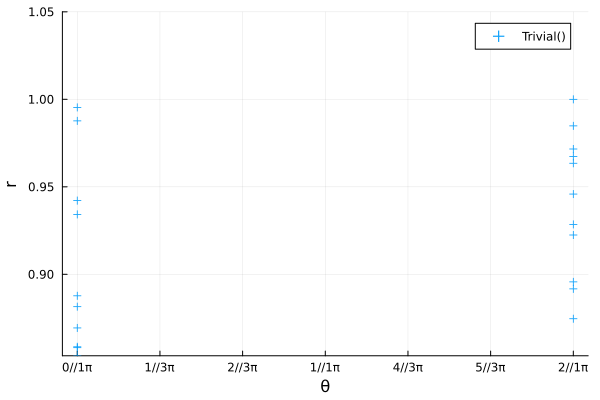

In [19]:
transferplot(ψ₀∞, ψ₀∞)

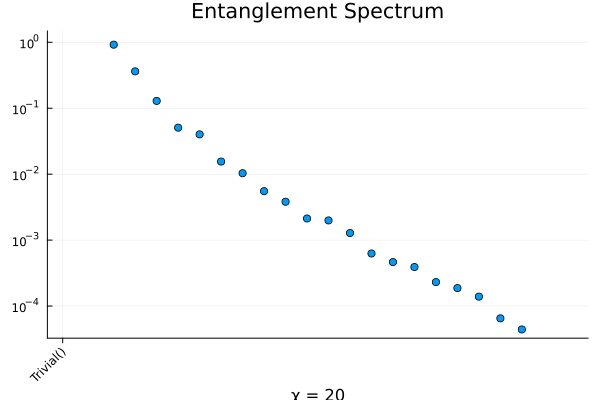

In [20]:
entanglementplot(ψ₀∞)

## Entanglement spectrum and entropy

Entanglement spectrum can be accessed through the $\textbf{entanglement_spectrum(psi, position)}$ function.
It returns Schmidt values $\Lambda_n$ at the entanglement cut. Meanwhile, entanglement spectrum is the spectrum $\lambda_n$ of a reduced density matrix $\rho_A$, and entanglement entropy is $S_A = \text{Tr} (\rho_A\ln\rho_A)$. These two are related in the following equalities.
\begin{align}
\lambda_n &= \Lambda_n^2\\
S_A &= \sum_n \lambda_n\ln (\lambda_n)
\end{align}

In [21]:
# position can be skipped for iDMRG. Equivalently, entanglement_spectrum(ψ₀∞,1)
Λₙ = entanglement_spectrum(ψ₀∞).values[1]
λₙ = Λₙ.^2

20-element Vector{Float64}:
 0.8475698565210369
 0.13116037263336514
 0.01668428920235479
 0.002572839714063252
 0.0016086111150178696
 0.00024102932327662126
 0.00010694906339784873
 3.0483534681264886e-5
 1.457849807583876e-5
 4.52608996031599e-6
 3.952275546618954e-6
 1.637405711605161e-6
 3.9242457843153285e-7
 2.158561416501415e-7
 1.5258094575979622e-7
 5.321789148046192e-8
 3.506733475710346e-8
 1.9284885042656013e-8
 4.242468513102827e-9
 1.9492659503538846e-9

In [22]:
# Check if the reduced density is properly normalized.
sum(λₙ)

0.9999999999999996

##### $S_A$ can be straightforwardly computed from $\lambda_n$

In [23]:
println("SA : ",sum(-λₙ.*log.(λₙ)))
println()
println("Alternatively, we can use a built-in function.")
println("SA : ",real(entropy(ψ₀∞)[1]))

SA : 0.5041906164551828

Alternatively, we can use a built-in function.
SA : 0.5041906164551835


## Finite-$\chi$ scaling
In iDMRG, we use $\xi(\chi)$ as a scaling parameter rather than the system size. CFT scaling then becomes
$$S_A(\chi) \approx \frac{c}{6}\ln\xi(\chi)$$

In [24]:
function compute_SA(χ)
    #Change accordingly for larger unitcell
    lattice∞ = InfiniteChain(1)
    # Your Hamiltonian
    H_TF∞ = @mpoham sum(nearest_neighbours(lattice∞)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice∞)) do i
            return X_term{i}
    end
    # physical dimension : Spin 1/2
    d = 2
    random_data = TensorMap(rand, ComplexF64, ℂ^χ * ℂ^d, ℂ^χ);
    state∞ = InfiniteMPS([random_data])
    ψ₀∞, cache, delta = find_groundstate(state∞, H_TF∞, VUMPS())
    SA = real(entropy(ψ₀∞)[1])
    Λₙ = entanglement_spectrum(ψ₀∞).values[1]
    λₙ = Λₙ.^2
    ξ = correlation_length(ψ₀∞)
    return ξ,SA,λₙ
end

compute_SA (generic function with 1 method)

In [25]:
χ_list = [10,12,14,16,18,20]
ξ_list = []
SA_list = []
for χ in χ_list
     ξ,SA,λₙ = compute_SA(χ)
    append!(ξ_list, ξ)
    append!(SA_list,SA)
end

┌ Info: VUMPS iteration:
│   iter = 1
│   ϵ = 0.011615281220439734
│   λ = -1.2725731276543966 - 8.593076937527071e-18im
└   Δt = 0.008215118
┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.0017227726751226557
│   λ = -1.2731953003826777 - 8.717561542240736e-17im
└   Δt = 0.009889173
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.0006939623824449916
│   λ = -1.2732194408744988 + 3.096643129670861e-17im
└   Δt = 0.010023394
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.00042516415533458017
│   λ = -1.2732288645419205 - 2.420678634706252e-18im
└   Δt = 0.010981112
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.00029070218761667274
│   λ = -1.273233500350905 - 1.2287185700257954e-16im
└   Δt = 0.041708801
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 0.00021705323783196824
│   λ = -1.2732357752023464 - 1.0331675239117258e-16im
└   Δt = 0.011951166
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 0.0001725293398637059
│   λ = -1.2732369571769702 + 3.910085587722613e-17im
└   Δt = 0.012300

┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 3.841929721566809e-7
│   λ = -1.2732386185976925 + 4.276717495516157e-17im
└   Δt = 0.014773244
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 3.088314488519349e-7
│   λ = -1.2732386185987767 - 1.955302873468427e-17im
└   Δt = 0.014930312
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 2.4823734318880174e-7
│   λ = -1.2732386185994835 - 1.999107276156548e-17im
└   Δt = 0.021259266
┌ Info: VUMPS iteration:
│   iter = 40
│   ϵ = 1.9952233649263212e-7
│   λ = -1.2732386185999345 - 1.7466451792414446e-17im
└   Δt = 0.014449614
┌ Info: VUMPS iteration:
│   iter = 41
│   ϵ = 1.603610251337487e-7
│   λ = -1.2732386186002298 + 7.788206435141618e-17im
└   Δt = 0.014447766
┌ Info: VUMPS iteration:
│   iter = 42
│   ϵ = 1.2888217554370974e-7
│   λ = -1.2732386186004203 - 9.134099325463496e-17im
└   Δt = 0.014480194
┌ Info: VUMPS iteration:
│   iter = 43
│   ϵ = 1.0358002153971174e-7
│   λ = -1.2732386186005442 + 5.2638982814019594e-17im
└   Δt = 0.021

┌ Info: VUMPS iteration:
│   iter = 75
│   ϵ = 9.479559528381004e-11
│   λ = -1.2732386186007645 - 5.831291080650977e-17im
└   Δt = 0.019328903
┌ Info: VUMPS iteration:
│   iter = 76
│   ϵ = 7.617827340285187e-11
│   λ = -1.273238618600766 + 7.65697228635379e-17im
└   Δt = 0.012434381
┌ Info: VUMPS iteration:
│   iter = 77
│   ϵ = 6.121679657303234e-11
│   λ = -1.2732386186007667 - 1.1103189502420956e-16im
└   Δt = 0.012498332
┌ Info: VUMPS iteration:
│   iter = 78
│   ϵ = 4.919433817260228e-11
│   λ = -1.273238618600765 - 3.7476833460624765e-17im
└   Δt = 0.012396434
┌ Info: VUMPS iteration:
│   iter = 79
│   ϵ = 3.953411685635935e-11
│   λ = -1.2732386186007645 - 1.6674359604631936e-17im
└   Δt = 0.012803746
┌ Info: VUMPS iteration:
│   iter = 80
│   ϵ = 3.176917477084397e-11
│   λ = -1.2732386186007667 - 2.0390727709124732e-17im
└   Δt = 0.018377775
┌ Info: VUMPS iteration:
│   iter = 81
│   ϵ = 2.5528642000644832e-11
│   λ = -1.2732386186007654 + 1.505292011223702e-17im
└   Δt = 0.

┌ Info: VUMPS iteration:
│   iter = 12
│   ϵ = 0.0001070499336347478
│   λ = -1.2732389034578295 - 4.7813315806610746e-17im
└   Δt = 0.030825474
┌ Info: VUMPS iteration:
│   iter = 13
│   ϵ = 8.413875318246598e-5
│   λ = -1.2732389669704758 + 3.0574501264091225e-17im
└   Δt = 0.019653243
┌ Info: VUMPS iteration:
│   iter = 14
│   ϵ = 6.614393663523794e-5
│   λ = -1.2732390118803503 - 1.5720931501039814e-17im
└   Δt = 0.019584509
┌ Info: VUMPS iteration:
│   iter = 15
│   ϵ = 5.134846545240278e-5
│   λ = -1.273239041433543 + 9.432558900623889e-18im
└   Δt = 0.025858915
┌ Info: VUMPS iteration:
│   iter = 16
│   ϵ = 4.021968889848223e-5
│   λ = -1.273239059847917 - 3.642919299551295e-17im
└   Δt = 0.019944264
┌ Info: VUMPS iteration:
│   iter = 17
│   ϵ = 3.147207983660553e-5
│   λ = -1.2732390710209702 + 3.491130995403324e-17im
└   Δt = 0.020609391
┌ Info: VUMPS iteration:
│   iter = 18
│   ϵ = 2.4572103148223027e-5
│   λ = -1.2732390776996796 - 2.3744027577432547e-17im
└   Δt = 0.02683

┌ Info: VUMPS iteration:
│   iter = 44
│   ϵ = 2.6392701216765678e-8
│   λ = -1.2732390873445447 - 1.2793585635328952e-17im
└   Δt = 0.028755382
┌ Info: VUMPS iteration:
│   iter = 45
│   ϵ = 2.0303843414958523e-8
│   λ = -1.2732390873445494 + 5.572799166575493e-17im
└   Δt = 0.022992401
┌ Info: VUMPS iteration:
│   iter = 46
│   ϵ = 1.5621251686205066e-8
│   λ = -1.2732390873445505 - 1.6263032587282567e-18im
└   Δt = 0.022994448
┌ Info: VUMPS iteration:
│   iter = 47
│   ϵ = 1.2019613594066008e-8
│   λ = -1.2732390873445523 + 1.5254724566871047e-16im
└   Δt = 0.028696049
┌ Info: VUMPS iteration:
│   iter = 48
│   ϵ = 9.24906198762236e-9
│   λ = -1.2732390873445527 - 4.8138576458356397e-17im
└   Δt = 0.022786732
┌ Info: VUMPS iteration:
│   iter = 49
│   ϵ = 7.117577627801362e-9
│   λ = -1.2732390873445523 + 7.296680620827445e-17im
└   Δt = 0.028910838
┌ Info: VUMPS iteration:
│   iter = 50
│   ϵ = 5.477594827082842e-9
│   λ = -1.2732390873445525 - 1.0928757898653885e-16im
└   Δt = 0.0

┌ Info: VUMPS iteration:
│   iter = 78
│   ϵ = 3.595497973466922e-12
│   λ = -1.2732390873445532 - 7.990570011218168e-17im
└   Δt = 0.014458883
┌ Info: VUMPS iteration:
│   iter = 79
│   ϵ = 2.765035274380286e-12
│   λ = -1.2732390873445543 + 1.0310762660337147e-16im
└   Δt = 0.0206299
┌ Info: VUMPS iteration:
│   iter = 80
│   ϵ = 2.128515256728975e-12
│   λ = -1.2732390873445536 - 7.144892316679474e-17im
└   Δt = 0.014283875
┌ Info: VUMPS iteration:
│   iter = 81
│   ϵ = 1.6418616549239083e-12
│   λ = -1.2732390873445536 + 3.0574501264091225e-17im
└   Δt = 0.014191402
┌ Info: VUMPS iteration:
│   iter = 82
│   ϵ = 1.2633940155844372e-12
│   λ = -1.273239087344555 + 3.3393426912553537e-17im
└   Δt = 0.01400971
┌ Info: VUMPS iteration:
│   iter = 83
│   ϵ = 9.74285511245646e-13
│   λ = -1.2732390873445534 + 7.535205098774256e-17im
└   Δt = 0.020335974
┌ Info: VUMPS summary:
│   ϵ = 9.74285511245646e-13
│   λ = -1.2732390873445534 + 7.535205098774256e-17im
└   Δt = 1.815419488
┌ Info: V

┌ Info: VUMPS iteration:
│   iter = 27
│   ϵ = 2.8458575596671067e-6
│   λ = -1.273239273326439 + 3.469446951953614e-17im
└   Δt = 0.029457532
┌ Info: VUMPS iteration:
│   iter = 28
│   ϵ = 2.1890593213145153e-6
│   λ = -1.2732392733612143 - 3.729655473350135e-17im
└   Δt = 0.034843931
┌ Info: VUMPS iteration:
│   iter = 29
│   ϵ = 1.6844608905827385e-6
│   λ = -1.2732392733813809 - 2.42861286636753e-17im
└   Δt = 0.034686253
┌ Info: VUMPS iteration:
│   iter = 30
│   ϵ = 1.297231562974741e-6
│   λ = -1.273239273393087 - 6.245004513516506e-17im
└   Δt = 0.029308345
┌ Info: VUMPS iteration:
│   iter = 31
│   ϵ = 1.0000473612843516e-6
│   λ = -1.273239273399902 + 2.7755575615628914e-17im
└   Δt = 0.034140413
┌ Info: VUMPS iteration:
│   iter = 32
│   ϵ = 7.719159624181558e-7
│   λ = -1.2732392734038718 - 1.3183898417423734e-16im
└   Δt = 0.028478043
┌ Info: VUMPS iteration:
│   iter = 33
│   ϵ = 5.96656265561842e-7
│   λ = -1.2732392734061917 + 8.413408858487514e-17im
└   Δt = 0.03461809

┌ Info: VUMPS iteration:
│   iter = 60
│   ϵ = 9.308900830358734e-10
│   λ = -1.2732392734095104 + 2.7755575615628914e-17im
└   Δt = 0.033815428
┌ Info: VUMPS iteration:
│   iter = 61
│   ϵ = 7.408752965941052e-10
│   λ = -1.2732392734095102 - 8.673617379884035e-18im
└   Δt = 0.028109538
┌ Info: VUMPS iteration:
│   iter = 62
│   ϵ = 5.898492654083105e-10
│   λ = -1.2732392734095126 + 2.6020852139652106e-18im
└   Δt = 0.032323468
┌ Info: VUMPS iteration:
│   iter = 63
│   ϵ = 4.697590664825927e-10
│   λ = -1.273239273409512 + 3.642919299551295e-17im
└   Δt = 0.026944461
┌ Info: VUMPS iteration:
│   iter = 64
│   ϵ = 3.742352647577512e-10
│   λ = -1.27323927340951 - 1.465841337200402e-16im
└   Δt = 0.032682809
┌ Info: VUMPS iteration:
│   iter = 65
│   ϵ = 2.9821852710214953e-10
│   λ = -1.2732392734095117 - 8.066464163292153e-17im
└   Δt = 0.025073642
┌ Info: VUMPS iteration:
│   iter = 66
│   ϵ = 2.377070469613502e-10
│   λ = -1.2732392734095108 + 9.540979117872439e-18im
└   Δt = 0.03

┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.004328757916542216
│   λ = -1.2729708711523062 - 3.2959746043559335e-17im
└   Δt = 0.018620296
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.001243646611043988
│   λ = -1.2732009913506372 - 8.673617379884035e-18im
└   Δt = 0.015434524
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.0003867328415409562
│   λ = -1.2732346273183195 + 3.8163916471489756e-17im
└   Δt = 0.016695473
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.00017200359085539057
│   λ = -1.2732379886830003 + 2.0816681711721685e-16im
└   Δt = 0.024083478
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 0.00011303243479158533
│   λ = -1.2732385264187047 + 3.2959746043559335e-17im
└   Δt = 0.020218138
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 8.845030802847455e-5
│   λ = -1.2732388205442933 - 1.6653345369377348e-16im
└   Δt = 0.027664168
┌ Info: VUMPS iteration:
│   iter = 8
│   ϵ = 7.453878461955582e-5
│   λ = -1.2732390141739875 - 1.734723475976807e-18im
└   Δt = 0.024621

┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 1.2429619618304493e-6
│   λ = -1.2732393873133605 - 8.673617379884035e-19im
└   Δt = 0.041153728
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 1.0460655262031908e-6
│   λ = -1.2732393873211554 - 2.688821387764051e-17im
└   Δt = 0.042020932
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 8.802372859979129e-7
│   λ = -1.2732393873266594 + 1.0061396160665481e-16im
└   Δt = 0.04172065
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 7.406164256835818e-7
│   λ = -1.2732393873305416 - 2.688821387764051e-17im
└   Δt = 0.036434029
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 6.23090118661615e-7
│   λ = -1.273239387333283 + 8.586881206085195e-17im
└   Δt = 0.041429676
┌ Info: VUMPS iteration:
│   iter = 40
│   ϵ = 5.241818876711361e-7
│   λ = -1.2732393873352197 + 1.196959198423997e-16im
└   Δt = 0.041627459
┌ Info: VUMPS iteration:
│   iter = 41
│   ϵ = 4.409565572487623e-7
│   λ = -1.2732393873365866 + 8.326672684688674e-17im
└   Δt = 0.041870214

┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 4.220790958625831e-9
│   λ = -1.2732393873398653 + 5.204170427930421e-18im
└   Δt = 0.04070231
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 3.558182648526592e-9
│   λ = -1.2732393873398649 - 1.734723475976807e-18im
└   Δt = 0.038926954
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 2.9999927949889375e-9
│   λ = -1.2732393873398653 + 8.933825901280557e-17im
└   Δt = 0.038973638
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 2.5297206675017145e-9
│   λ = -1.273239387339864 - 9.194034422677078e-17im
└   Δt = 0.039797867
┌ Info: VUMPS iteration:
│   iter = 72
│   ϵ = 2.1334705232565566e-9
│   λ = -1.2732393873398649 - 1.9081958235744878e-17im
└   Δt = 0.039491827
┌ Info: VUMPS iteration:
│   iter = 73
│   ϵ = 1.7995486308768693e-9
│   λ = -1.2732393873398653 + 2.5153490401663703e-17im
└   Δt = 0.034237166
┌ Info: VUMPS iteration:
│   iter = 74
│   ϵ = 1.5181142878280602e-9
│   λ = -1.2732393873398642 - 4.2500725161431774e-17im
└   Δt = 0.039

┌ Info: VUMPS iteration:
│   iter = 1
│   ϵ = 0.015060769672538924
│   λ = -1.2719424592357824 - 1.2088854223213374e-16im
└   Δt = 0.01416076
┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.002046618714098242
│   λ = -1.2731866013622506 - 3.979021973021801e-17im
└   Δt = 0.019662942
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.00047759300111996724
│   λ = -1.2732309434276885 - 4.412702842016003e-17im
└   Δt = 0.016933682
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.0002532363388003101
│   λ = -1.27323488279575 - 7.166576360129184e-17im
└   Δt = 0.018305634
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.00017715333909843864
│   λ = -1.2732369054006991 + 1.0278236595162582e-16im
└   Δt = 0.025687022
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 0.0001381565112100373
│   λ = -1.2732379984012554 + 3.664603343001005e-17im
└   Δt = 0.029444228
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 0.0001147628749426702
│   λ = -1.2732385796714745 + 4.607859233063394e-17im
└   Δt = 0.025819534


┌ Info: VUMPS iteration:
│   iter = 33
│   ϵ = 9.116324715563115e-7
│   λ = -1.2732394536684277 + 1.0386656812411132e-16im
└   Δt = 0.052159467
┌ Info: VUMPS iteration:
│   iter = 34
│   ϵ = 7.316969721728506e-7
│   λ = -1.2732394536727751 + 4.336808689942018e-19im
└   Δt = 0.051291596
┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 5.869153382413014e-7
│   λ = -1.2732394536755485 + 7.827939685345342e-17im
└   Δt = 0.050894308
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 4.7055115306543995e-7
│   λ = -1.2732394536773184 + 1.7564075194265172e-17im
└   Δt = 0.055634255
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 3.771115247107438e-7
│   λ = -1.2732394536784504 - 1.3010426069826053e-18im
└   Δt = 0.051536945
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 3.021338466795264e-7
│   λ = -1.2732394536791714 - 3.187554387107383e-17im
└   Δt = 0.051195076
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 2.4200538594696237e-7
│   λ = -1.273239453679633 - 2.42861286636753e-17im
└   Δt = 0.051112

┌ Info: VUMPS iteration:
│   iter = 65
│   ϵ = 7.424810792328192e-10
│   λ = -1.273239453680445 + 1.9081958235744878e-17im
└   Δt = 0.050287654
┌ Info: VUMPS iteration:
│   iter = 66
│   ϵ = 5.94294975582498e-10
│   λ = -1.273239453680445 - 7.15573433840433e-18im
└   Δt = 0.048966599
┌ Info: VUMPS iteration:
│   iter = 67
│   ϵ = 4.75678894203577e-10
│   λ = -1.2732394536804463 - 1.214306433183765e-17im
└   Δt = 0.048712525
┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 3.80736748465912e-10
│   λ = -1.273239453680448 - 6.136584296267955e-17im
└   Δt = 0.053484163
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 3.047428694829077e-10
│   λ = -1.2732394536804459 + 9.107298248878237e-17im
└   Δt = 0.046820297
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 2.43913900367559e-10
│   λ = -1.273239453680445 - 4.5319650809894085e-17im
└   Δt = 0.047187503
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 1.9523001029041156e-10
│   λ = -1.2732394536804459 - 2.8189256484623115e-18im
└   Δt = 0.0465431

┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.003348310045589715
│   λ = -1.2730543684060687 - 4.85722573273506e-17im
└   Δt = 0.023250808
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.0009186787923786345
│   λ = -1.2732159926989106 + 1.214306433183765e-16im
└   Δt = 0.026261712
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.00030973542317189835
│   λ = -1.2732363451522994 + 1.1622647289044608e-16im
└   Δt = 0.022952281
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.00018759435231533174
│   λ = -1.2732382154025168 - 1.4051260155412137e-16im
└   Δt = 0.028984528
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 0.0001255638685453319
│   λ = -1.2732386465361683 + 3.9898639947466563e-17im
└   Δt = 0.033312914
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 9.181071535798898e-5
│   λ = -1.2732389149710097 - 5.898059818321144e-17im
└   Δt = 0.037647537
┌ Info: VUMPS iteration:
│   iter = 8
│   ϵ = 6.77194274906356e-5
│   λ = -1.2732391003057344 - 6.245004513516506e-17im
└   Δt = 0.041405849

┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 9.162494200154924e-7
│   λ = -1.2732394732367465 + 9.367506770274758e-17im
└   Δt = 0.066544971
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 7.552192931988068e-7
│   λ = -1.273239473240432 - 1.240327285323417e-16im
└   Δt = 0.06219836
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 6.225470195889757e-7
│   λ = -1.273239473242922 + 3.122502256758253e-17im
└   Δt = 0.067226517
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 5.128145460137727e-7
│   λ = -1.273239473244608 + 8.153200337090993e-17im
└   Δt = 0.061724794
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 4.2247260719496483e-7
│   λ = -1.2732394732457466 - 1.6479873021779667e-17im
└   Δt = 0.066909107
┌ Info: VUMPS iteration:
│   iter = 40
│   ϵ = 3.478812510045085e-7
│   λ = -1.273239473246516 - 2.8102520310824275e-16im
└   Δt = 0.062586867
┌ Info: VUMPS iteration:
│   iter = 41
│   ϵ = 2.864989086512375e-7
│   λ = -1.2732394732470382 + 5.204170427930421e-18im
└   Δt = 0.067110006
┌

┌ Info: VUMPS iteration:
│   iter = 67
│   ϵ = 2.0010604138077263e-9
│   λ = -1.2732394732481245 + 1.7433970933566911e-16im
└   Δt = 0.06584666
┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 1.667861520937552e-9
│   λ = -1.2732394732481225 + 1.8214596497756474e-17im
└   Δt = 0.060652747
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 1.3916934089133377e-9
│   λ = -1.2732394732481227 - 6.591949208711867e-17im
└   Δt = 0.064474705
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 1.1626771598187262e-9
│   λ = -1.2732394732481247 + 6.418476861114186e-17im
└   Δt = 0.059039622
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 9.725350768148977e-10
│   λ = -1.2732394732481245 - 3.903127820947816e-17im
└   Δt = 0.06498489
┌ Info: VUMPS iteration:
│   iter = 72
│   ϵ = 8.145514276139414e-10
│   λ = -1.273239473248125 + 4.0766001685454967e-17im
└   Δt = 0.059380836
┌ Info: VUMPS iteration:
│   iter = 73
│   ϵ = 6.831350221858522e-10
│   λ = -1.2732394732481236 - 3.122502256758253e-17im
└   Δt = 0.063

┌ Info: VUMPS iteration:
│   iter = 99
│   ϵ = 1.0938778385714223e-11
│   λ = -1.273239473248123 + 2.2551405187698492e-17im
└   Δt = 0.049307131
┌ Info: VUMPS iteration:
│   iter = 100
│   ϵ = 9.442945669125187e-12
│   λ = -1.2732394732481223 + 1.9081958235744878e-17im
└   Δt = 0.049129183
┌ Warning: VUMPS maximum iterations
│   iter = 100
│   ϵ = 9.442945669125187e-12
│   λ = -1.2732394732481223 + 1.9081958235744878e-17im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/vumps.jl:94
┌ Info: VUMPS summary:
│   ϵ = 9.442945669125187e-12
│   λ = -1.2732394732481223 + 1.9081958235744878e-17im
└   Δt = 5.83399489


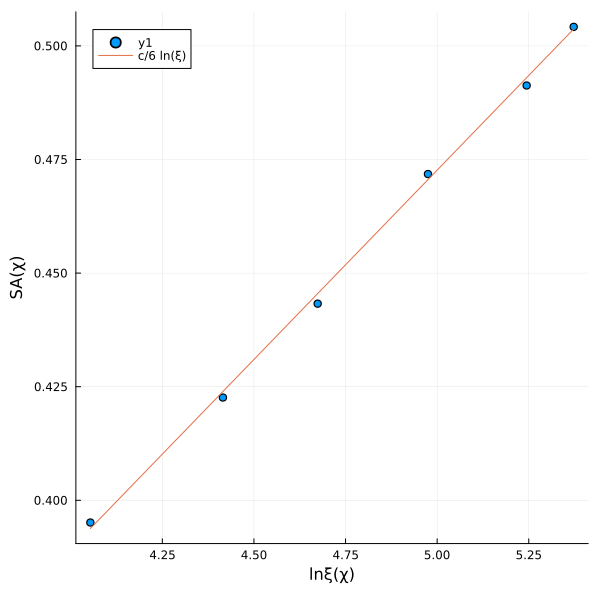

In [26]:
c=1/2
plot(log.(ξ_list),SA_list,st=:scatter,size=(600,600),xlabel="lnξ(χ)",ylabel="SA(χ)")
plot!(log.(ξ_list),c/6*log.(ξ_list).+0.056,label="c/6 ln(ξ)")

In [27]:
entanglement_spectrum(ψ₀∞)

TensorKit.SortedVectorDict{Trivial, Vector{Float64}} with 1 entry:
  Trivial() => [0.920636, 0.362161, 0.129168, 0.0507232, 0.0401075, 0.0155251, …

## Entanglement spectrum
Finally, let us take a closer look at the entanglement spectrum. We shall see the boundary scaling dimension as discussed in [Lauchil's paper](https://arxiv.org/pdf/1303.0741.pdf).
$$\ln \lambda_n \propto \Delta_n$$

In [28]:
L = 150
χ = 30
lattice = FiniteChain(L)
H_TF = @mpoham sum(1:(L-1)) do i
            return ZZ_term{lattice[i],lattice[i+1]}
        end + sum(1:L) do i
            return X_term{lattice[i]}
        end 
state = FiniteMPS(rand,ComplexF64,L,ℂ^2,ℂ^χ)
ψ₀, cache, delta = find_groundstate(state, H_TF, DMRG());

┌ Info: DMRG iteration:
│   iter = 1
│   ϵ = 0.0001599720909078292
│   λ = -190.62342010725686 + 2.427825186905181e-14im
└   Δt = 33.995027751
┌ Info: DMRG iteration:
│   iter = 2
│   ϵ = 2.2494442571535684e-7
│   λ = -190.6234212465159 + 2.937596189096566e-14im
└   Δt = 29.214861911
┌ Info: DMRG iteration:
│   iter = 3
│   ϵ = 6.509170705354492e-8
│   λ = -190.62342124810675 + 2.489255576520538e-15im
└   Δt = 18.875476165
┌ Info: DMRG iteration:
│   iter = 4
│   ϵ = 5.2781290265239356e-8
│   λ = -190.62342124868434 - 5.751416892782979e-14im
└   Δt = 15.297110626
┌ Info: DMRG iteration:
│   iter = 5
│   ϵ = 2.4173857467409356e-8
│   λ = -190.62342124872566 - 1.4815593477423364e-14im
└   Δt = 11.088059056
┌ Info: DMRG iteration:
│   iter = 6
│   ϵ = 9.441371907666318e-9
│   λ = -190.62342124872944 - 3.8099490507484835e-14im
└   Δt = 7.774318837
┌ Info: DMRG iteration:
│   iter = 7
│   ϵ = 4.23441904697551e-9
│   λ = -190.62342124873027 - 5.739271346507084e-14im
└   Δt = 6.337332805
┌ In

In [29]:
ψ₀

150-site FiniteMPS:
┌── AC[150]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^1)
├── AL[149]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^2)
├── AL[148]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^4)
├── AL[147]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^8)
├── AL[146]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^16)
├── AL[145]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[144]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[143]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[142]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[141]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[140]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
│⋮
├── AL[10]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[9]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[8]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[7]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[6]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[5]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^30)
├── AL[4]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^16)
├── AL[3]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^8)
├── AL[2]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^4)
└── AL[1]: TensorMap((ℂ^1 ⊗ ℂ^2) ← ℂ^2)


In [30]:
# Let us see the entanglement spectrum in the center
λₙ = entanglement_spectrum(ψ₀,50).values[1].^2

30-element Vector{Float64}:
 0.7714094660524285
 0.21273145335518268
 0.01197506643519487
 0.0033023614222664065
 0.0004370725442784797
 0.0001205307220442477
 1.1631746651781971e-5
 6.784723057279393e-6
 3.2073763326121445e-6
 1.8709954985599124e-6
 2.4010537196050343e-7
 1.8035957528006348e-7
 6.613274734223825e-8
 ⋮
 1.0492444897597772e-9
 1.0004950363055176e-9
 1.1750259756913232e-10
 1.0035720255069322e-10
 4.973962896236548e-11
 3.925427202606963e-11
 3.033429290010095e-11
 2.7341028547227343e-11
 1.3329833490975868e-11
 9.49734669342248e-12
 2.484290819548072e-12
 1.3875934849831212e-12

In [31]:
sum(λₙ)

1.0000000000000024

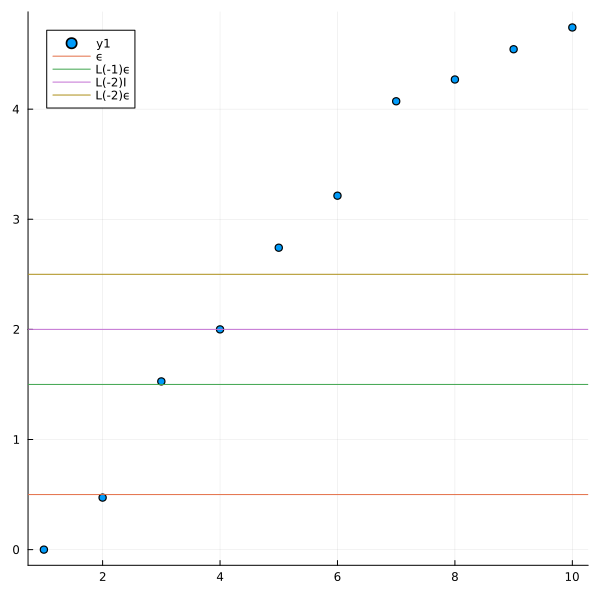

In [32]:
normalization = log.(λₙ[1]./λₙ[4])
plot(2*log.(λₙ[1]./λₙ[1:10])/normalization,st=:scatter,size=(600,600))
hline!([0.5],label="ϵ")
hline!([1.5],label="L(-1)ϵ")
hline!([2.0],label="L(-2)I")
hline!([2.5],label="L(-2)ϵ")

Finite-size effects persists logarithmically.

## You can do the same thing with iDMRG. 
For the purpose of accuracy, let us impose $\mathbb{Z}_2$ symmetry.

In [33]:
# alg = VUMPS(;tol_galerkin = 1e-12,tol_gauge=1e-12,maxiter = 700,verbose=false)
χ = 40
H = transverse_field_ising(Z2Irrep,g=g)
Ψ₀ = InfiniteMPS([Rep[ℤ₂](0 => 1, 1 => 1)], [Rep[ℤ₂](0 => χ//2, 1 => χ//2)])
Ψ, envs, δ = find_groundstate(Ψ₀, H, VUMPS())

┌ Info: VUMPS iteration:
│   iter = 1
│   ϵ = 0.01113992034791491
│   λ = -1.2721973469414554 + 1.9949319973733282e-17im
└   Δt = 0.111222335
┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.0028415013133923084
│   λ = -1.2730715096524101 + 4.0332320816460765e-17im
└   Δt = 0.126757494
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.0009910523244049945
│   λ = -1.2732027296290744 + 5.0306980803327406e-17im
└   Δt = 0.097740776
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.00038565629831663394
│   λ = -1.2732321267082543 + 1.0234868508263162e-16im
└   Δt = 0.127336196
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.00016145103473629114
│   λ = -1.2732383208087437 - 5.204170427930421e-18im
└   Δt = 0.154882196
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 7.613212909363546e-5
│   λ = -1.273239161740766 + 1.1188966420050406e-16im
└   Δt = 0.169829516
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 5.053893638642854e-5
│   λ = -1.2732393019640518 + 6.331740687315346e-17im
└   Δt = 0.2014028

┌ Info: VUMPS iteration:
│   iter = 33
│   ϵ = 1.062722176936818e-6
│   λ = -1.2732395278636317 + 1.6479873021779667e-17im
└   Δt = 0.431913968
┌ Info: VUMPS iteration:
│   iter = 34
│   ϵ = 8.955263297415425e-7
│   λ = -1.2732395278711164 + 6.158268339717665e-17im
└   Δt = 0.431121586
┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 7.539238104470176e-7
│   λ = -1.2732395278763402 + 0.0im
└   Δt = 0.44000113
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 6.342246772551877e-7
│   λ = -1.2732395278799835 - 4.683753385137379e-17im
└   Δt = 0.477396102
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 5.33256681416799e-7
│   λ = -1.2732395278825255 + 1.1102230246251565e-16im
└   Δt = 0.439557623
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 4.4821736858218185e-7
│   λ = -1.2732395278842983 + 1.0061396160665481e-16im
└   Δt = 0.443219179
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 3.767105596510504e-7
│   λ = -1.273239527885534 + 6.071532165918825e-18im
└   Δt = 0.434777302
┌ Info: VUMPS it

┌ Info: VUMPS iteration:
│   iter = 65
│   ϵ = 1.0322684755928526e-8
│   λ = -1.273239527888399 + 3.122502256758253e-17im
└   Δt = 0.464340353
┌ Info: VUMPS iteration:
│   iter = 66
│   ϵ = 9.474675124904601e-9
│   λ = -1.2732395278883994 - 2.5153490401663703e-17im
└   Δt = 0.463165025
┌ Info: VUMPS iteration:
│   iter = 67
│   ϵ = 8.71467062366944e-9
│   λ = -1.2732395278883992 + 5.204170427930421e-18im
└   Δt = 0.470231763
┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 8.030294640709994e-9
│   λ = -1.2732395278884017 + 3.8163916471489756e-17im
└   Δt = 0.477227086
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 7.411397787217305e-9
│   λ = -1.2732395278884017 - 1.6479873021779667e-17im
└   Δt = 0.48428337
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 6.849605770837406e-9
│   λ = -1.2732395278884006 + 4.85722573273506e-17im
└   Δt = 0.459385446
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 6.337965945716269e-9
│   λ = -1.273239527888399 - 5.204170427930421e-17im
└   Δt = 0.499182039


┌ Info: VUMPS iteration:
│   iter = 97
│   ϵ = 1.0142277114276565e-9
│   λ = -1.2732395278884008 - 6.938893903907228e-17im
└   Δt = 0.441873939
┌ Info: VUMPS iteration:
│   iter = 98
│   ϵ = 9.487334684367476e-10
│   λ = -1.273239527888401 - 1.0755285551056204e-16im
└   Δt = 0.437428516
┌ Info: VUMPS iteration:
│   iter = 99
│   ϵ = 8.876115093469297e-10
│   λ = -1.2732395278884017 - 4.423544863740858e-17im
└   Δt = 0.442935772
┌ Info: VUMPS iteration:
│   iter = 100
│   ϵ = 8.305567488883523e-10
│   λ = -1.2732395278884021 + 6.071532165918825e-18im
└   Δt = 0.434107859
┌ Warning: VUMPS maximum iterations
│   iter = 100
│   ϵ = 8.305567488883523e-10
│   λ = -1.2732395278884021 + 6.071532165918825e-18im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/vumps.jl:94
┌ Info: VUMPS summary:
│   ϵ = 8.305567488883523e-10
│   λ = -1.2732395278884021 + 6.071532165918825e-18im
└   Δt = 41.410468246


(│   ⋮
│ CR[1]: TensorMap(Rep[ℤ₂](0=>20, 1=>20) ← Rep[ℤ₂](0=>20, 1=>20))
├── AL[1]: TensorMap((Rep[ℤ₂](0=>20, 1=>20) ⊗ Rep[ℤ₂](0=>1, 1=>1)) ← Rep[ℤ₂](0=>20, 1=>20))
│   ⋮
, MPSKit.MPOHamInfEnv{MPOHamiltonian{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 2, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}}, ComplexF64}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 1, 0, 0, Nothing}}, InfiniteMPS{TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 1, 0, 0, Nothing}}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 1, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{C

In [34]:
λ∞_odd = entanglement_spectrum(Ψ)[Z2Irrep(1)].^2
λ∞_even = entanglement_spectrum(Ψ)[Z2Irrep(0)].^2

20-element Vector{Float64}:
 0.27505618490922923
 0.04500120757393244
 0.006092530838519509
 0.000657124153313136
 0.00017602023646013195
 5.275658328512377e-5
 1.788343199585222e-5
 2.686861835440542e-6
 2.3945969519798617e-6
 1.2532395732796568e-6
 3.6805003423132865e-7
 1.3703989717705793e-7
 5.628490954848801e-8
 5.0760231733919185e-8
 1.8451316830146587e-8
 1.5452510531190937e-8
 3.284564307445026e-9
 2.020762890416457e-9
 8.504878430920326e-10
 3.595860900783589e-10

In [35]:
sum(λ∞_even) + sum(λ∞_odd)

1.0000000000000002

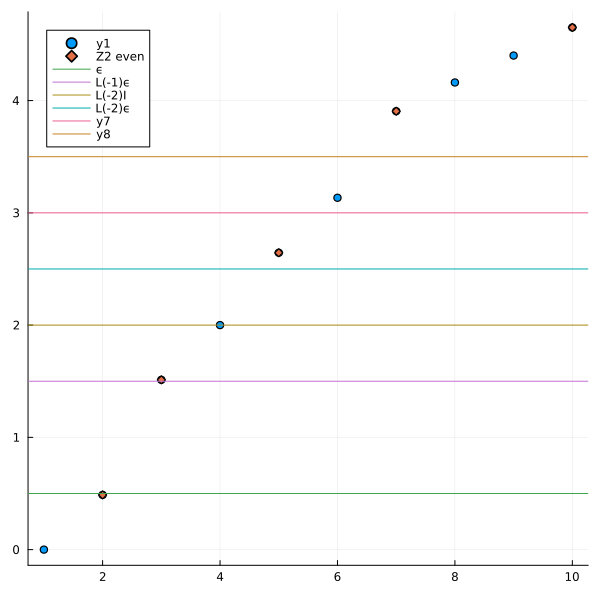

In [36]:
λ∞ = sort([λ∞_even..., λ∞_odd...],rev=true)
λmax = λ∞[1]
normalization = log(λ∞[1]/λ∞[4])
plot(2*log.(λmax./λ∞[1:10])/normalization,st=:scatter,size=(600,600))
plot!([2,3,5,7,10],2*log.(λmax./λ∞_even[1:5])/normalization,st=:scatter,marker=:diamond,size=(600,600),label="Z2 even")
hline!([0.5],label="ϵ")
hline!([1.5],label="L(-1)ϵ")
hline!([2.0],label="L(-2)I")
hline!([2.5],label="L(-2)ϵ")
hline!([3])
hline!([3.5])